In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data

https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey

View "PhotoObj" objid = Object Identifier ra = J2000 Right Ascension (r-band) dec = J2000 Declination (r-band) Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit g = better of DeV/Exp magnitude fit r = better of DeV/Exp magnitude fit i = better of DeV/Exp magnitude fit z = better of DeV/Exp magnitude fit The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

run = Run Number rereun = Rerun Number camcol = Camera column field = Field number Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan, the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs. An additional number, rerun, specifies how the image was processed. View "SpecObj" specobjid = Object Identifier class = object class (galaxy, star or quasar object) The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift plate = plate number mjd = MJD of observation fiberid = fiber ID

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Yapay Zeka ve Teknoloji Akademisi/Veri Bilimi ve Makina Öğrenmesi (Udemy)/5-Makina Öğrenmesi/7-Ensemble Learning Methods/2- Boosting/20-digitalskysurvey.csv')

In [ ]:
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [ ]:
columns_to_drop = ["objid", "specobjid", "rerun", "camcol", "field", "run"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [ ]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  plate    mjd  fiberid  
0    STAR -0.000009   3306  54922      491  
1    STAR -0.000055    323  51615      541  
2  GALAXY  0.123111    287  52023      513  
3    STAR -0.000111   3306  54922      510  
4    STAR  0.000590   3306  54922      512

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   class     10000 non-null  object 
 8   redshift  10000 non-null  float64
 9   plate     10000 non-null  int64  
 10  mjd       10000 non-null  int64  
 11  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 937.6+ KB


In [ ]:
df['class'].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

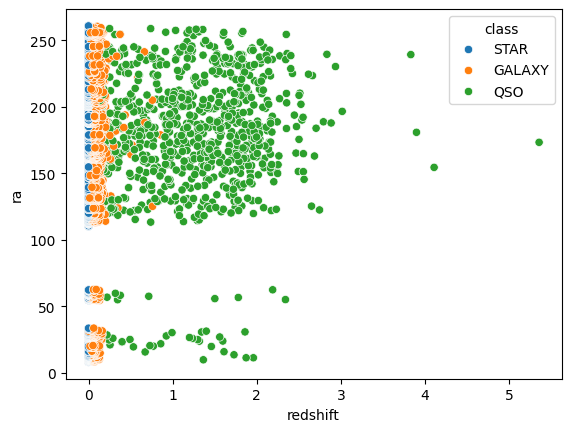

In [ ]:
sns.scatterplot(data = df, x = "redshift", y = "ra", hue= "class")
plt.show()

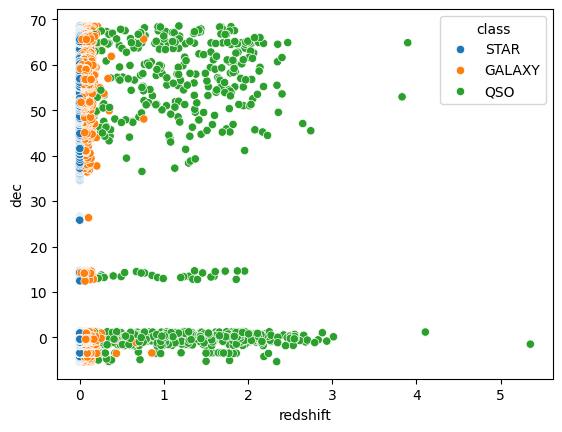

In [ ]:
sns.scatterplot(data = df, x = "redshift", y = "dec", hue= "class")
plt.show()

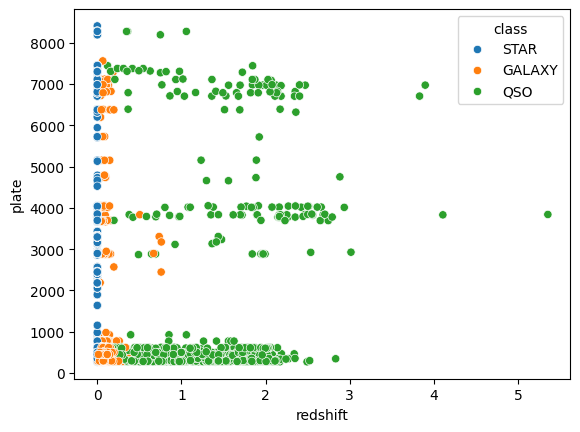

In [ ]:
sns.scatterplot(data = df, x = "redshift", y = "plate", hue= "class")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [ ]:
df.corr()

ra       dec         u         g         r         i  \
ra        1.000000  0.003596  0.031238  0.043909  0.047103  0.045731   
dec       0.003596  1.000000  0.035279  0.061875  0.063404  0.058292   
u         0.031238  0.035279  1.000000  0.849232  0.692379  0.602630   
g         0.043909  0.061875  0.849232  1.000000  0.958106  0.907419   
r         0.047103  0.063404  0.692379  0.958106  1.000000  0.977672   
i         0.045731  0.058292  0.602630  0.907419  0.977672  1.000000   
z         0.042950  0.056870  0.551483  0.879622  0.969197  0.981507   
class    -0.043219 -0.058918 -0.269044 -0.099212  0.049628  0.146791   
redshift  0.030307  0.067021  0.163741  0.407576  0.441080  0.431450   
plate    -0.095329  0.088342 -0.129430 -0.054981  0.019787  0.072958   
mjd      -0.086887  0.066147 -0.168793 -0.092772 -0.009345  0.050896   
fiberid   0.057485  0.155012  0.011301  0.047187  0.061081  0.069977   

                 z     class  redshift     plate       mjd   fiberid  
ra        0.042950 -0.043219  0.030307 -0.095329 -0.086887  0.057485  
dec       0.056870 -0.058918  0.067021  0.088342  0.066147  0.155012  
u         0.551483 -0.269044  0.163741 -0.129430 -0.168793  0.011301  
g         0.879622 -0.099212  0.407576 -0.054981 -0.092772  0.047187  
r         0.969197  0.049628  0.441080  0.019787 -0.009345  0.061081  
i         0.981507  0.146791  0.431450  0.072958  0.050896  0.069977  
z         1.000000  0.215758  0.424034  0.112397  0.095658  0.067980  
class     0.215758  1.000000 -0.075510  0.585495  0.648768  0.053593  
redshift  0.424034 -0.075510  1.000000 -0.038091 -0.057957  0.046532  
plate     0.112397  0.585495 -0.038091  1.000000  0.966881  0.229811  
mjd       0.095658  0.648768 -0.057957  0.966881  1.000000  0.190328  
fiberid   0.067980  0.053593  0.046532  0.229811  0.190328  1.000000

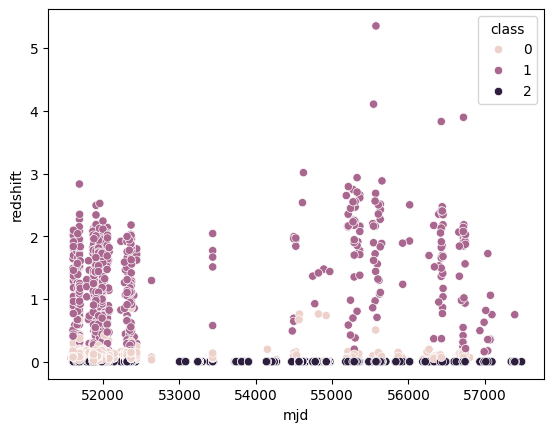

In [ ]:
sns.scatterplot(data = df, x = "mjd", y = "redshift", hue= "class")
plt.show()

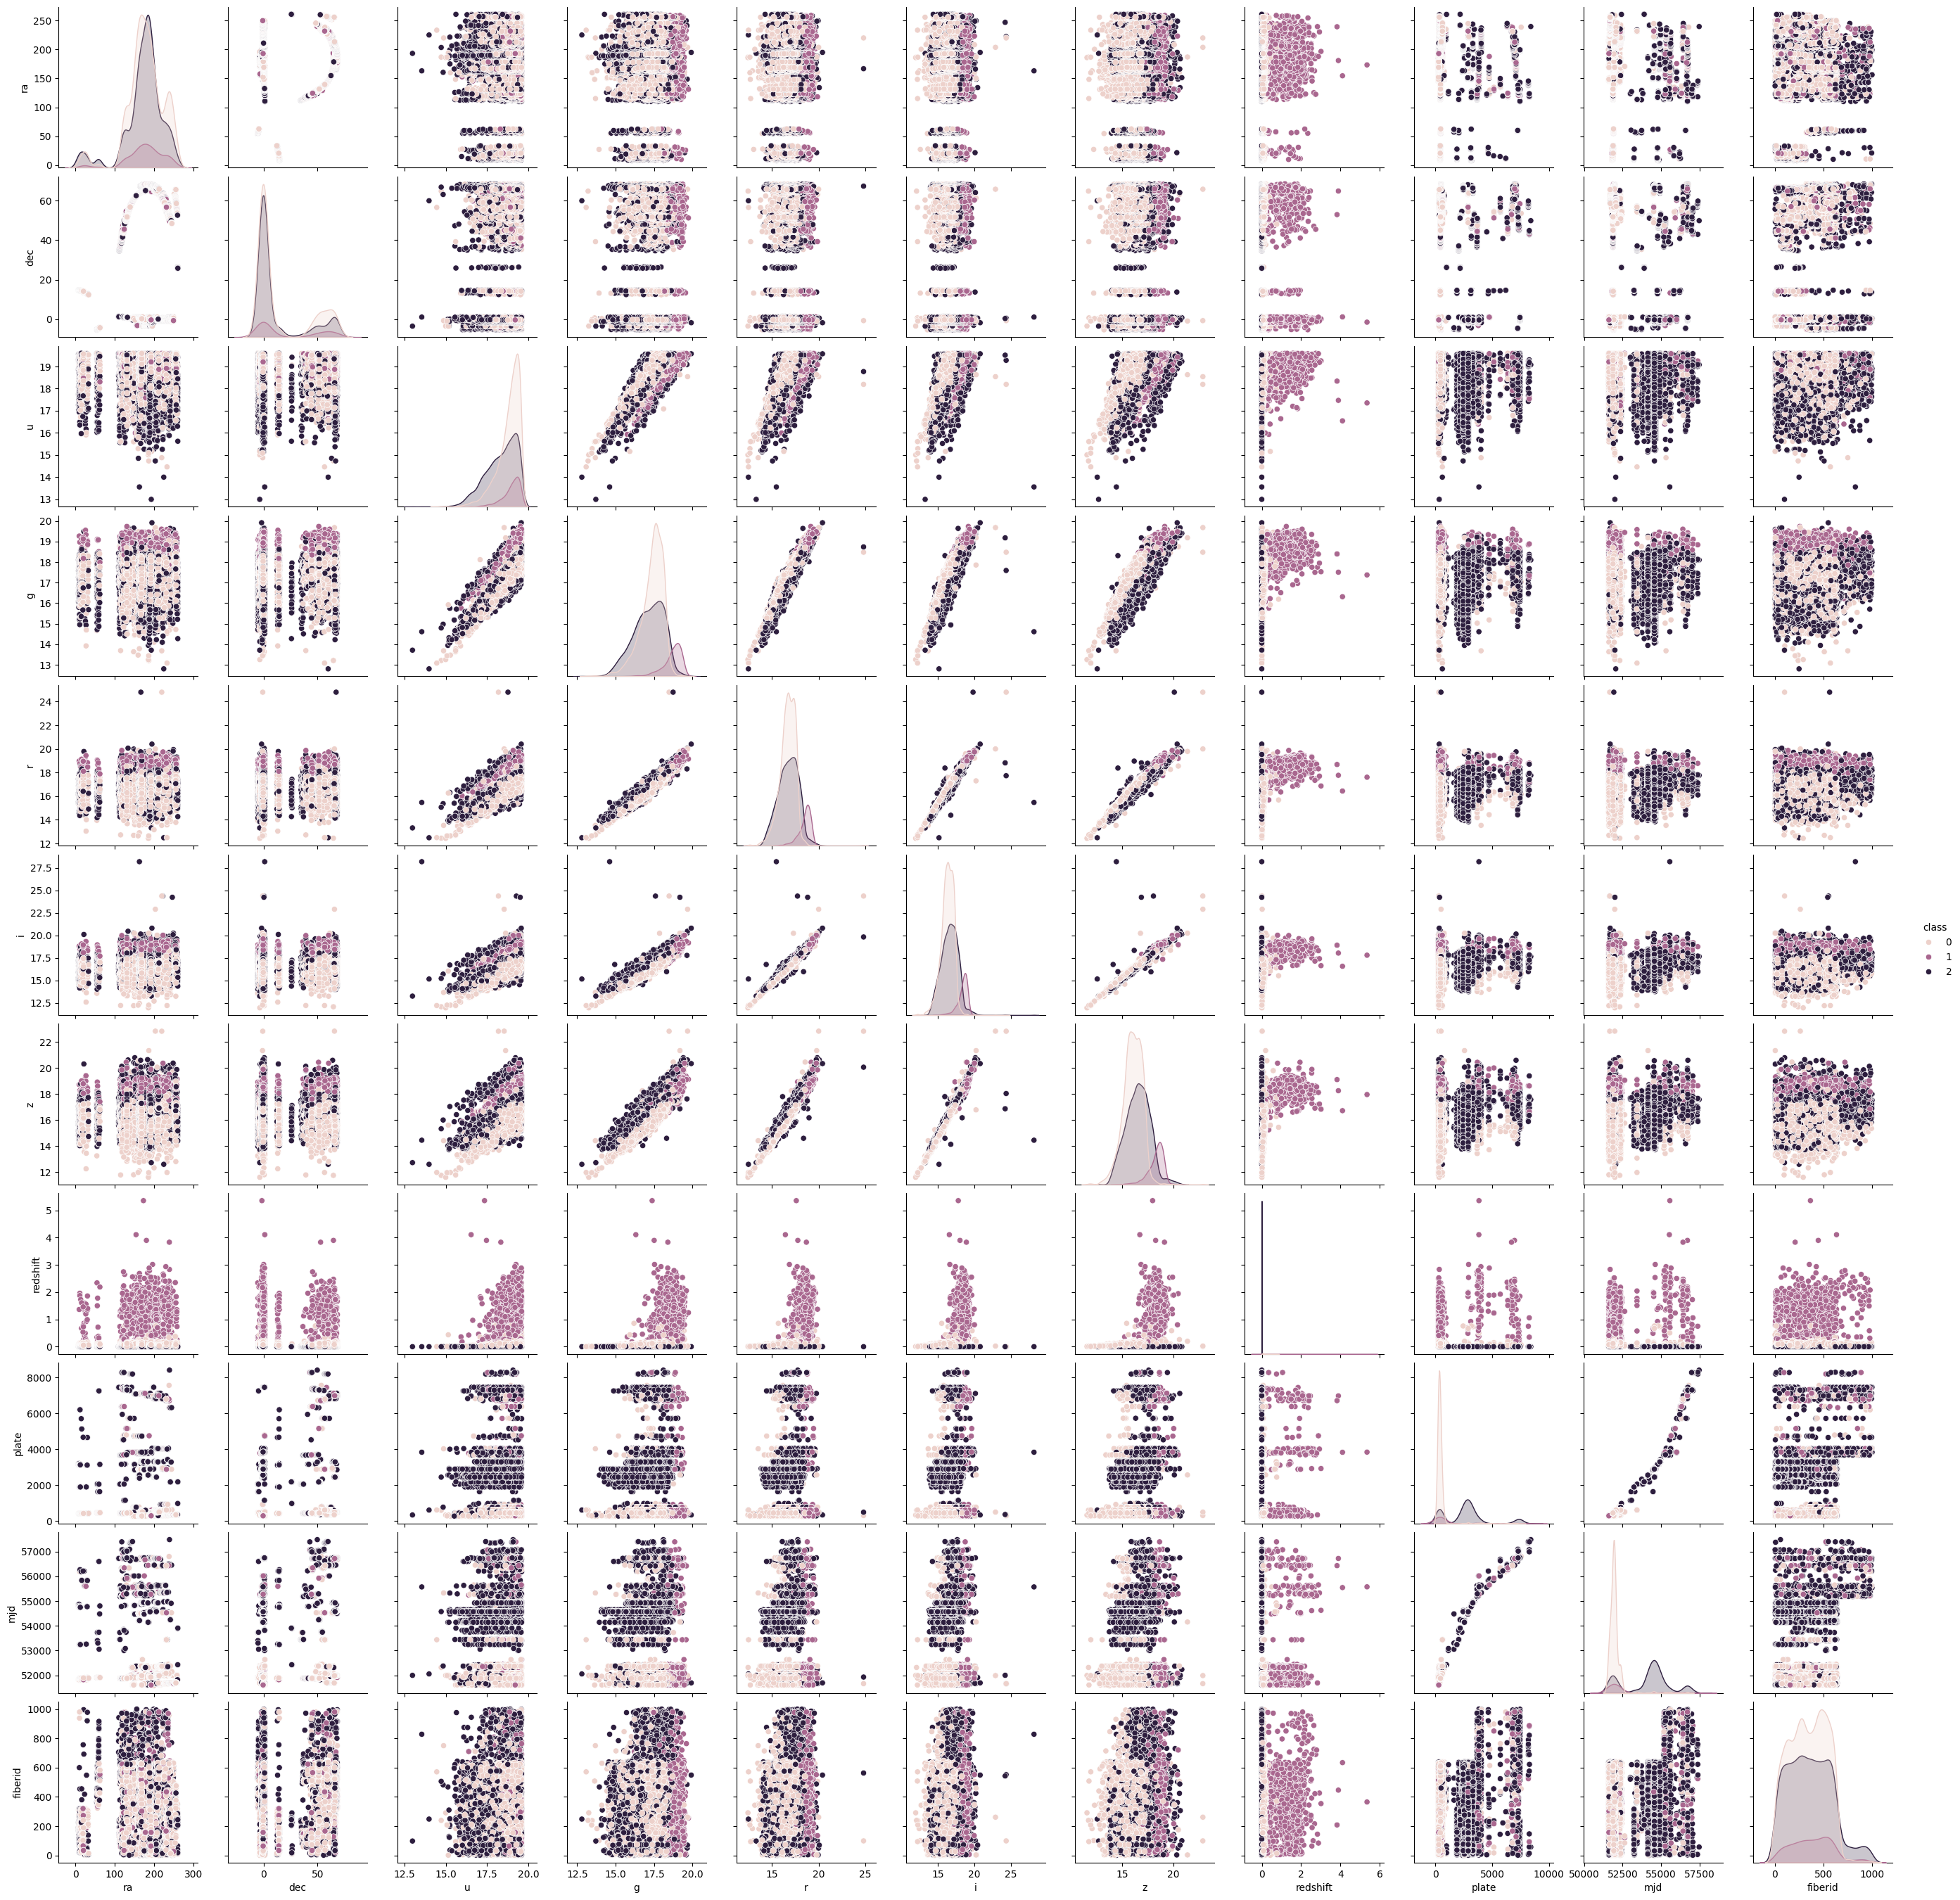

In [ ]:
sns.pairplot(df, hue = "class")
plt.show()

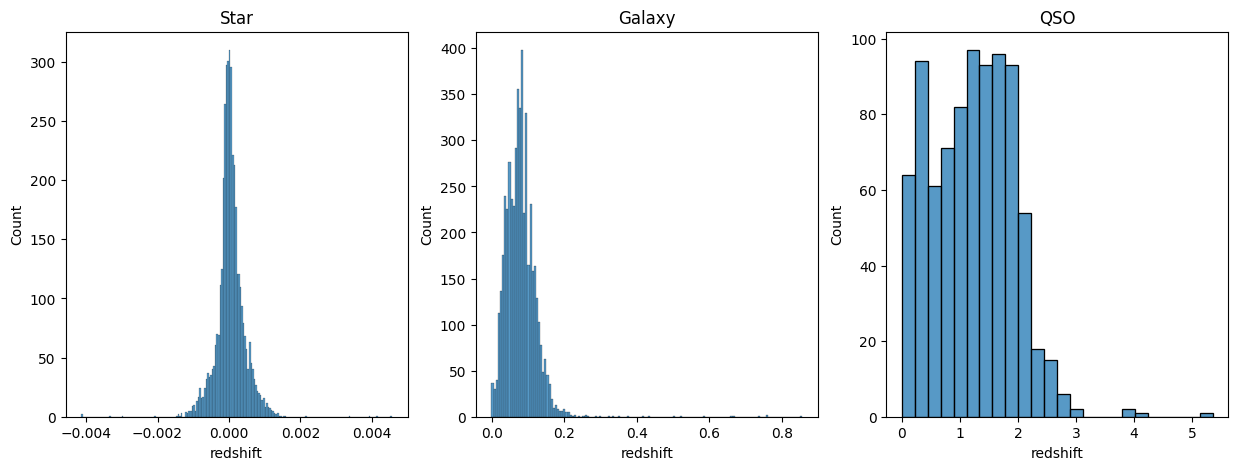

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

ax = sns.histplot(df[df["class"] == 2].redshift, ax = axes[0])
ax.set_title("Star")
ax = sns.histplot(df[df["class"] == 0].redshift, ax = axes[1])
ax.set_title("Galaxy")
ax = sns.histplot(df[df["class"] == 1].redshift, ax = axes[2])
ax.set_title("QSO")

plt.show()

In [ ]:
df["class"].value_counts()

class
0    4998
2    4152
1     850
Name: count, dtype: int64

#Training

##Train-Test-Split, Scaling

In [ ]:
X = df.drop("class", axis = 1)
y = df["class"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("confusion matrix \n", confusion_matrix(y_test, y_pred))
print("classification report \n", classification_report(y_test, y_pred))
print("accuracy score \n", accuracy_score(y_test, y_pred))

confusion matrix 
 [[1483    8    6]
 [  17  269    0]
 [   1    0 1216]]
classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1497
           1       0.97      0.94      0.96       286
           2       1.00      1.00      1.00      1217

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

accuracy score 
 0.9893333333333333
